# Importing the dataset from kaggle

In [19]:
import kagglehub
kartik2112_fraud_detection_path = kagglehub.dataset_download('kartik2112/fraud-detection')

print('Data source import complete.')


Data source import complete.


In [20]:
print(kartik2112_fraud_detection_path)

/kaggle/input/fraud-detection


In [21]:
import os
contents = os.listdir(kartik2112_fraud_detection_path)

print(f"Contents of the directory '{kartik2112_fraud_detection_path}':")
for item in contents:
    print(item)

Contents of the directory '/kaggle/input/fraud-detection':
fraudTest.csv
fraudTrain.csv


# Importing the required libraries

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
trainPath = r"/kaggle/input/fraud-detection/fraudTrain.csv"
testPath = r"/kaggle/input/fraud-detection/fraudTest.csv"
trainData = pd.read_csv(trainPath)
testData = pd.read_csv(testPath)

In [24]:
trainData.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [25]:
testData.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [26]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [27]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

# Performing some data cleaning and feature engineering
- dropped columns that I didn't need.
- transformed `trans_date_trans_time` to `hour_of_day`,`day_of_week`, `is_weekend`, `month`, and `year`.
- tranformed `dob` to `age`.

In [28]:
columns_to_drop = ['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num', 'merchant', 'gender', 'city', 'state', 'job']
trainData = trainData.drop(columns=columns_to_drop, axis=1)
testData = testData.drop(columns=columns_to_drop, axis=1)

In [29]:
trainData['trans_date_trans_time'] = pd.to_datetime(trainData['trans_date_trans_time'])
trainData['dob'] = pd.to_datetime(trainData['dob'], format='%Y-%m-%d')

trainData['hour_of_day'] = trainData['trans_date_trans_time'].dt.hour
trainData['day_of_week'] = trainData['trans_date_trans_time'].dt.dayofweek # Monday=0, Sunday=6
trainData['is_weekend'] = (trainData['trans_date_trans_time'].dt.dayofweek >= 5).astype(int)
trainData['month'] = trainData['trans_date_trans_time'].dt.month
trainData['year'] = trainData['trans_date_trans_time'].dt.year

trainData['age'] = trainData['year'] - trainData['dob'].dt.year

In [30]:
testData['trans_date_trans_time'] = pd.to_datetime(testData['trans_date_trans_time'])
testData['dob'] = pd.to_datetime(testData['dob'], format='%Y-%m-%d')

testData['hour_of_day'] = testData['trans_date_trans_time'].dt.hour
testData['day_of_week'] = testData['trans_date_trans_time'].dt.dayofweek # Monday=0, Sunday=6
testData['is_weekend'] = (testData['trans_date_trans_time'].dt.dayofweek >= 5).astype(int)
testData['month'] = testData['trans_date_trans_time'].dt.month
testData['year'] = testData['trans_date_trans_time'].dt.year

testData['age'] = testData['year'] - testData['dob'].dt.year

In [31]:
# # Sort data by time
# trainData = trainData.sort_values(by=['trans_date_trans_time'])
trainData = trainData.drop('trans_date_trans_time', axis=1)
testData = testData.drop('trans_date_trans_time', axis=1)

trainData = trainData.drop('dob', axis=1)
testData = testData.drop('dob', axis=1)

In [32]:
trainData.info()
trainData.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   category     1296675 non-null  object 
 1   amt          1296675 non-null  float64
 2   zip          1296675 non-null  int64  
 3   lat          1296675 non-null  float64
 4   long         1296675 non-null  float64
 5   city_pop     1296675 non-null  int64  
 6   unix_time    1296675 non-null  int64  
 7   merch_lat    1296675 non-null  float64
 8   merch_long   1296675 non-null  float64
 9   is_fraud     1296675 non-null  int64  
 10  hour_of_day  1296675 non-null  int32  
 11  day_of_week  1296675 non-null  int32  
 12  is_weekend   1296675 non-null  int64  
 13  month        1296675 non-null  int32  
 14  year         1296675 non-null  int32  
 15  age          1296675 non-null  int32  
dtypes: float64(5), int32(5), int64(5), object(1)
memory usage: 133.6+ MB


,category,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour_of_day,day_of_week,is_weekend,month,year,age
0,misc_net,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,0,1,0,1,2019,31
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,0,1,0,1,2019,41


In [33]:
print(f"Number of unique categories in trainData: {trainData['category'].nunique()}")

Number of unique categories in trainData: 14


# Performing One-Hot Encoding on the `category` column for Train Data

In [34]:
# Perform One-Hot Encoding on the 'category' column for trainData
category_dummies_train = pd.get_dummies(trainData['category'], prefix='category')
trainData = pd.concat([trainData, category_dummies_train], axis=1)
trainData = trainData.drop('category', axis=1) # Drop the original category column

# Perform One-Hot Encoding on the 'category' column for testData
# It's important to use the same categories found in the training data
category_dummies_test = pd.get_dummies(testData['category'], prefix='category')

# Align columns to ensure consistency between train and test sets.
# This handles cases where a category might appear in the test set but not in the training set (or vice versa).
testData_aligned = category_dummies_test.reindex(columns=category_dummies_train.columns, fill_value=0)

# Concatenate the aligned dummy columns to the testData DataFrame
testData = pd.concat([testData, testData_aligned], axis=1)
testData = testData.drop('category', axis=1)

trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   zip                      1296675 non-null  int64  
 2   lat                      1296675 non-null  float64
 3   long                     1296675 non-null  float64
 4   city_pop                 1296675 non-null  int64  
 5   unix_time                1296675 non-null  int64  
 6   merch_lat                1296675 non-null  float64
 7   merch_long               1296675 non-null  float64
 8   is_fraud                 1296675 non-null  int64  
 9   hour_of_day              1296675 non-null  int32  
 10  day_of_week              1296675 non-null  int32  
 11  is_weekend               1296675 non-null  int64  
 12  month                    1296675 non-null  int32  
 13  year                     1296675 non-null 

In [35]:
X_train = trainData.drop('is_fraud', axis=1)
y_train = trainData['is_fraud']

X_test = testData.drop('is_fraud', axis=1)
y_test = testData['is_fraud']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Declaring different clasiification models for training

In [36]:
log_reg = LogisticRegression(random_state=42)

dec_tree = DecisionTreeClassifier(random_state=42)

rand_forest = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# Training the data

In [37]:
print("Training Logistic Regression...")
log_reg.fit(X_train, y_train)
print("Logistic Regression training complete.")

print("Training Decision Tree...")
dec_tree.fit(X_train, y_train)
print("Decision Tree training complete.")

print("Training Random Forest...")
rand_forest.fit(X_train, y_train)
print("Random Forest training complete.")

Training Logistic Regression...
Logistic Regression training complete.
Training Decision Tree...
Decision Tree training complete.
Training Random Forest...
Random Forest training complete.


In [38]:
print("Making predictions on test data...")
y_pred_log_reg = log_reg.predict(X_test)
y_pred_dec_tree = dec_tree.predict(X_test)
y_pred_rand_forest = rand_forest.predict(X_test)
print("Predictions complete.")

Making predictions on test data...
Predictions complete.


# Evaluating the Scores of each models

In [39]:
# 4. Evaluate Models

print("\n--- Model Evaluation ---")

# Function to evaluate a model and print metrics
def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name}:")
    print("Accuracy Score:")
    print(accuracy_score(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    try:
        # ROC AUC requires probability scores
        y_prob = model.predict_proba(X_test)[:, 1]
        print(f"ROC AUC Score: {roc_auc_score(y_true, y_prob):.4f}")
    except AttributeError:
        print("ROC AUC Score: Probability prediction not available for this model.")


# Evaluate each model
model = log_reg
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)

model = dec_tree
evaluate_model("Decision Tree", y_test, y_pred_dec_tree)

model = rand_forest
evaluate_model("Random Forest", y_test, y_pred_rand_forest)


--- Model Evaluation ---

Logistic Regression:
Accuracy Score:
0.9955139198047934
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Confusion Matrix:
[[553226    348]
 [  2145      0]]
ROC AUC Score: 0.8278

Decision Tree:
Accuracy Score:
0.9967537550452656
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.56      0.76      0.64      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.88      0.82    555719
weighted avg       1.00      1.00      1.00    555719

Confusion Matrix:
[[552280   1294]
 [   510   1635]]
ROC AUC Score: 0.8800

Random Forest:


# Report
- Accuracy score of each model is above 90% but they are false case.
- You can see below that in training dataset the imbalance is really large so the models are recognizing the not_fraud instead of the is_fraud.
- Beacuse of this we are having the case of Accuracy Paradox

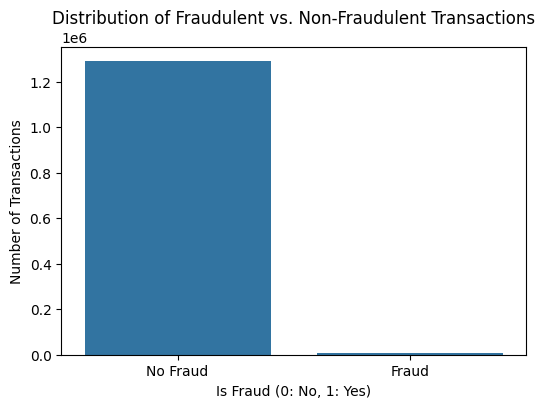

In [42]:
fraud_counts = trainData['is_fraud'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraud (0: No, 1: Yes)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'])
plt.show()